# Problem Statement:

There are various factor which are overlooked while buying a house. In our dataset we have 81 variables which are related to purchase parameters while buying a house. Our motive is to create a model, which can predict the house prices. 

**Importing libraries**

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r"/Users/samvigya/Downloads")

In [3]:
df = pd.read_csv("housing_dataset.csv")

In [4]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",100)

In [5]:
df.shape

(1460, 81)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


**Checking for missing values**

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

**Missing value treatment**

In [11]:
df['PoolQC'] = df['PoolQC'].fillna(value = "No Pool")
df['MiscFeature'] = df['MiscFeature'].fillna(value = "None")
df['Alley'] = df['Alley'].fillna("No Alley")
df['Fence'] = df['Fence'].fillna("No Fence")
df['FireplaceQu'] = df['FireplaceQu'].fillna("No Fireplace")
df['GarageCond'] = df['GarageCond'].fillna("No Garage")
df['GarageType'] = df['GarageType'].fillna("No Garage")
df['GarageFinish'] = df['GarageFinish'].fillna("No Garage")
df['GarageQual'] = df['GarageQual'].fillna("No Garage")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("No Basement")
df['BsmtExposure'] = df['BsmtExposure'].fillna("No Exposure")
df['BsmtCond'] = df['BsmtCond'].fillna("No condition")
df['BsmtFinType2'] = df['BsmtFinType2'].fillna("No Basement")
df['BsmtQual'] = df['BsmtQual'].fillna("No Basement")

In [12]:
df.isnull().sum().sort_values(ascending = False)

LotFrontage      259
GarageYrBlt       81
MasVnrType         8
MasVnrArea         8
Electrical         1
KitchenQual        0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
Id                 0
GarageFinish       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
KitchenAbvGr       0
GarageCars         0
GarageArea         0
PoolQC             0
SaleCondition      0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
MiscFeature        0
Fence              0
PoolArea           0
GarageQual         0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageCond         0
1stFlrSF           0
HeatingQC          0
CentralAir         0
LandSlope          0
OverallCond        0
OverallQual        0
HouseStyle   

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [14]:
df.dropna(inplace = True)

**Density Plot of our Target variale 'SalePrice'**

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

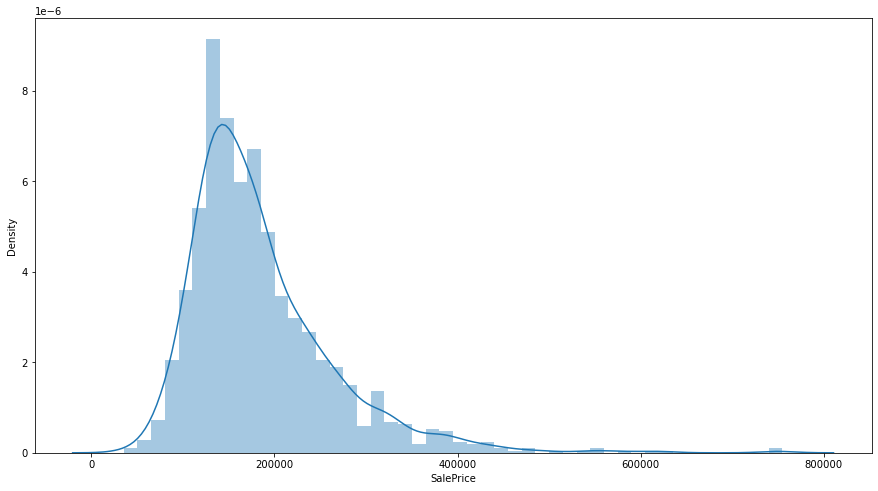

In [15]:
plt.figure(figsize=(15, 8))

sns.distplot(df['SalePrice'], hist=True)


**Creating correlation matrix**

In [16]:
cor = df.corr()

In [17]:
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019467,-0.012776,-0.034652,-0.045919,0.008184,-0.024085,-0.029081,-0.053361,-0.005248,-0.006476,-0.009951,-0.018126,0.010273,-0.001093,-0.046983,0.003055,0.009730,-0.027705,0.000865,-0.011215,0.041446,0.020708,0.026482,-0.018327,-0.003532,0.009158,0.010809,-0.030354,-0.005384,0.003692,-0.048268,0.001248,0.058923,-0.004697,0.013834,0.010787,-0.030987
MSSubClass,0.019467,1.000000,-0.355731,-0.134249,0.052488,-0.099187,0.060179,0.036852,0.034038,-0.067319,-0.079750,-0.136682,-0.240464,-0.251857,0.307615,0.020123,0.074968,-0.010733,0.000340,0.128989,0.196234,-0.056691,0.247696,0.023840,-0.024609,0.085528,0.012643,-0.065689,-0.009248,-0.000714,-0.020429,-0.044149,-0.022004,0.010263,-0.022066,-0.016930,-0.023277,-0.076093
LotFrontage,-0.012776,-0.355731,1.000000,0.299232,0.225650,-0.042514,0.103349,0.081258,0.176204,0.220671,0.041284,0.109034,0.359321,0.408413,0.067589,0.011054,0.361018,0.104684,-0.000577,0.169066,0.039331,0.240901,-0.001828,0.315991,0.227425,0.066050,0.269440,0.332654,0.068921,0.144175,0.013937,0.061463,0.032769,0.185681,-0.001987,0.017238,0.011263,0.327706
LotArea,-0.034652,-0.134249,0.299232,1.000000,0.090561,0.000630,-0.004303,0.004292,0.096287,0.209134,0.110495,-0.011411,0.250562,0.287870,0.048299,0.010282,0.255214,0.160638,0.046781,0.113466,0.007916,0.117700,-0.020503,0.183614,0.263352,-0.024055,0.137891,0.168110,0.168086,0.086727,-0.018401,0.018578,0.038919,0.077075,0.040437,0.001501,-0.012456,0.253784
OverallQual,-0.045919,0.052488,0.225650,0.090561,1.000000,-0.135684,0.572148,0.557872,0.402906,0.220260,-0.072343,0.320010,0.530981,0.467898,0.289875,-0.014204,0.591248,0.105865,-0.056204,0.559064,0.263904,0.086365,-0.174081,0.430584,0.383704,0.547677,0.580609,0.526230,0.229108,0.313148,-0.105743,0.024900,0.051929,0.064873,-0.028867,0.062848,-0.016776,0.786304
OverallCond,0.008184,-0.099187,-0.042514,0.000630,-0.135684,1.000000,-0.404519,0.050065,-0.135522,-0.046687,0.037662,-0.141073,-0.178769,-0.141934,0.015260,0.042908,-0.089057,-0.058479,0.120999,-0.214357,-0.062604,0.016542,-0.094549,-0.066807,-0.023050,-0.323979,-0.246861,-0.197039,-0.007034,-0.052030,0.067900,0.026310,0.056516,-0.002577,0.078957,-0.011398,0.049851,-0.093986
YearBuilt,-0.024085,0.060179,0.103349,-0.004303,0.572148,-0.404519,1.000000,0.615631,0.303387,0.230457,-0.065166,0.158860,0.380151,0.262121,0.015944,-0.159294,0.195597,0.181121,-0.052806,0.484218,0.232678,-0.069712,-0.163777,0.103557,0.117073,0.824502,0.523370,0.445363,0.215284,0.218063,-0.377951,0.027096,-0.068034,0.001593,-0.033503,0.005791,-0.007784,0.508127
YearRemodAdd,-0.029081,0.036852,0.081258,0.004292,0.557872,0.050065,0.615631,1.000000,0.174880,0.114723,-0.076512,0.190135,0.285783,0.238492,0.127960,-0.063057,0.280294,0.111787,-0.019348,0.445916,0.179199,-0.065355,-0.172761,0.175683,0.104119,0.640097,0.450286,0.382366,0.206268,0.233628,-0.209119,0.044501,-0.046775,0.004475,-0.002848,0.014395,0.039436,0.506063
MasVnrArea,-0.053361,0.034038,0.176204,0.096287,0.402906,-0.135522,0.303387,0.174880,1.000000,0.257041,-0.078309,0.113705,0.357156,0.336612,0.174101,-0.061132,0.392269,0.084947,0.017414,0.273193,0.196299,0.108914,-0.018553,0.286751,0.235708,0.253348,0.363691,0.368737,0.150905,0.129953,-0.105202,0.015478,0.054039,0.009768,-0.029603,-0.010454,-0.004663,0.468055
BsmtFinSF1,-0.005248,-0.067319,0.220671,0.209134,0.220260,-0.046687,0.230457,0.114723,0.257041,1.000000,-0.054371,-0.504356,0.519022,0.443545,-0.141121,-0.049956,0.205781,0.645230,0.061895,0.042005,-0.009069,-0.116248,-0.072388,0.044434,0.251658,0.153196,0.200271,0.287389,0.195878,0.115770,-0.100533,0.02

**Creating heatmat of our correlation matrix**

<AxesSubplot:>

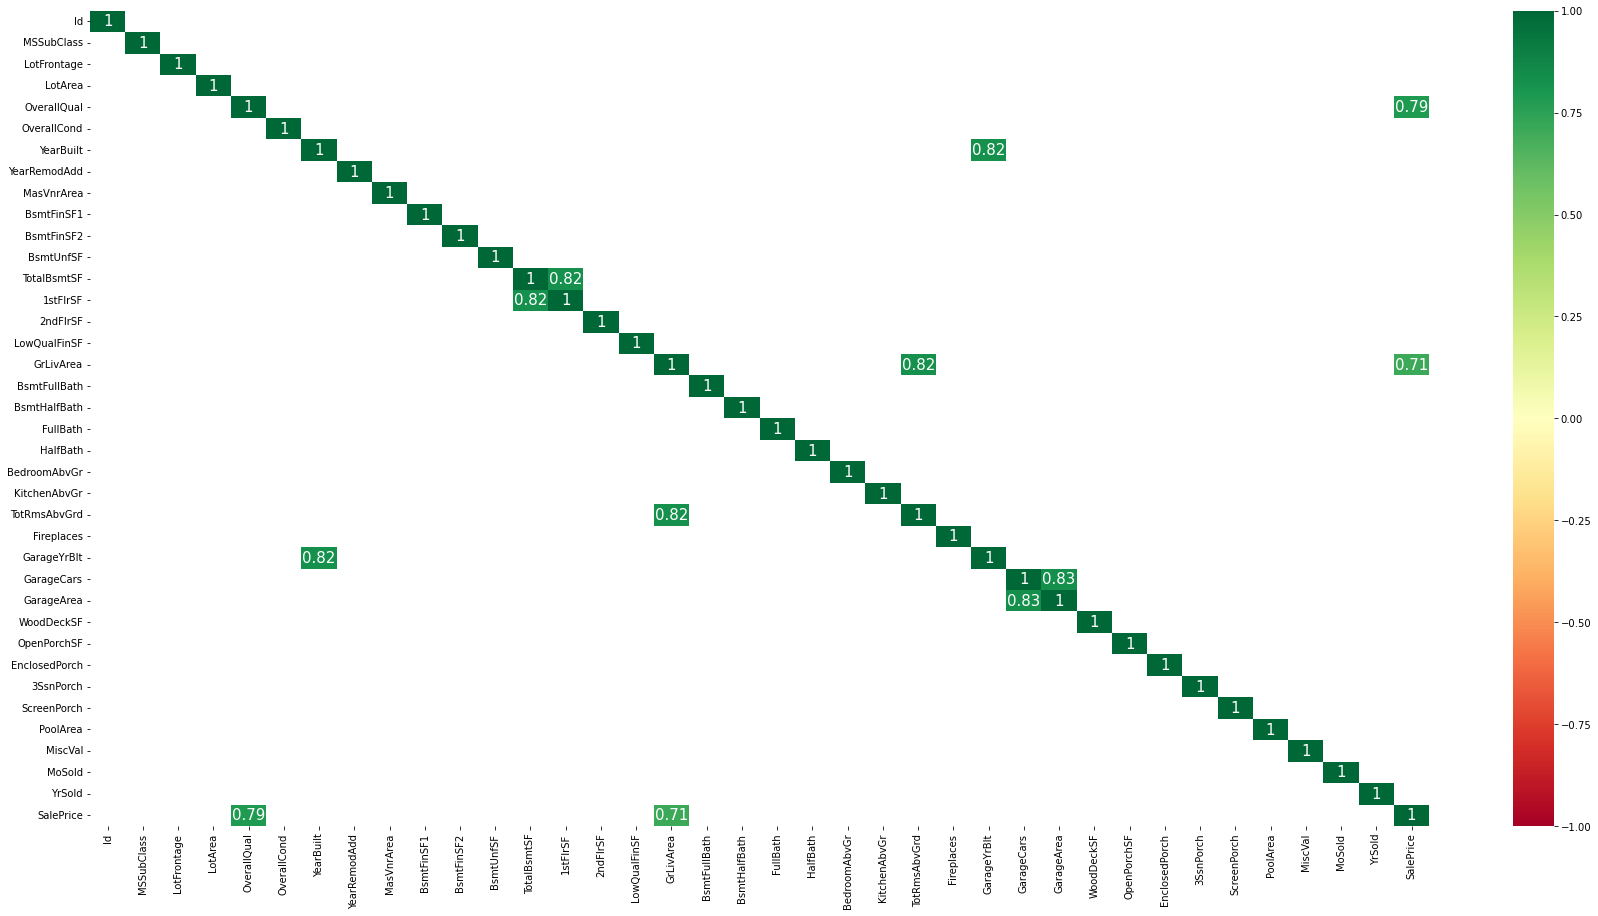

In [18]:
plt.figure(figsize=(30, 15))


sns.heatmap(cor[(cor >= 0.7) | (cor <= -0.7)], cmap = "RdYlGn", vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})


## The heatmap shows the correlation of all the numeric variables

**Barchart of 'OverallQual' and 'SalePrice'**

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

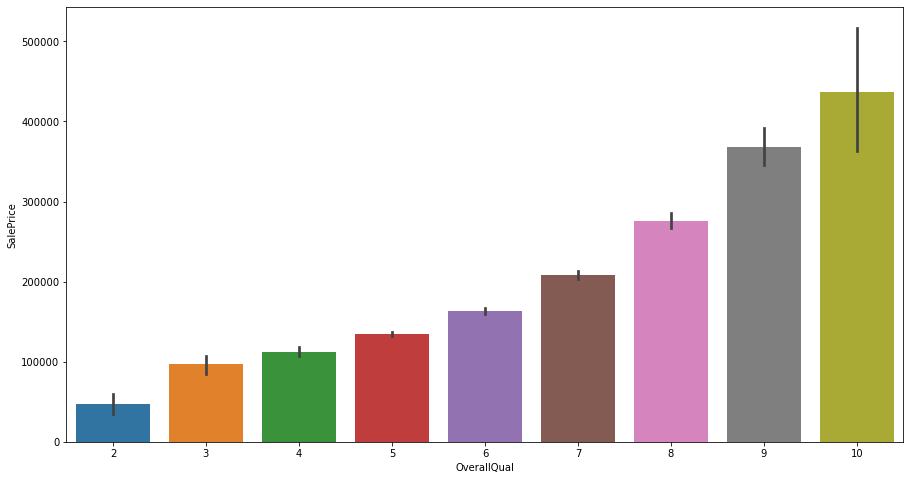

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(df.OverallQual, df.SalePrice)

## The above barchart depicts that the price of higher quality house are more 

**Box plot of 'Street' and 'SalePrice'**

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

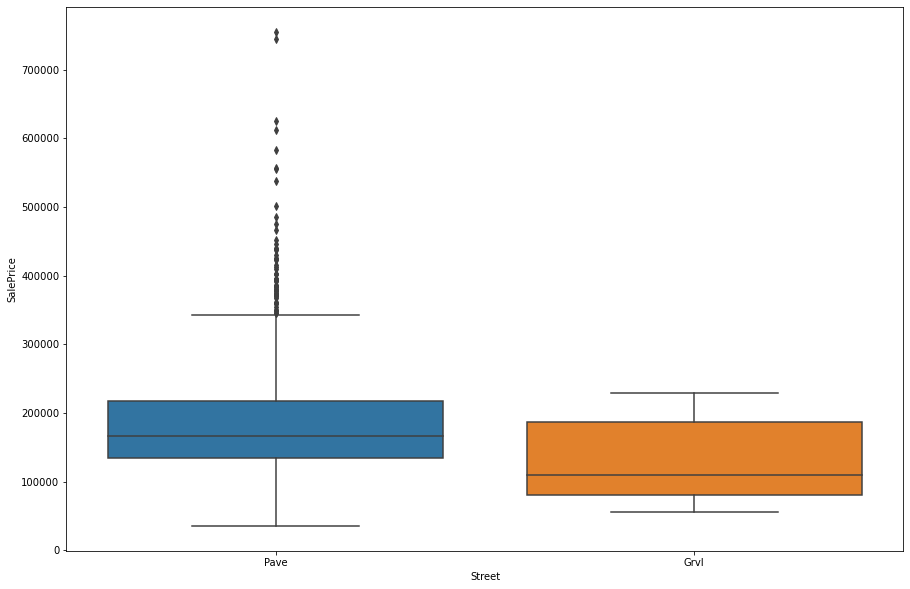

In [20]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Street', y = 'SalePrice',data = df)

**Box plot of 'OverallQual' and 'SalePrice'**

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

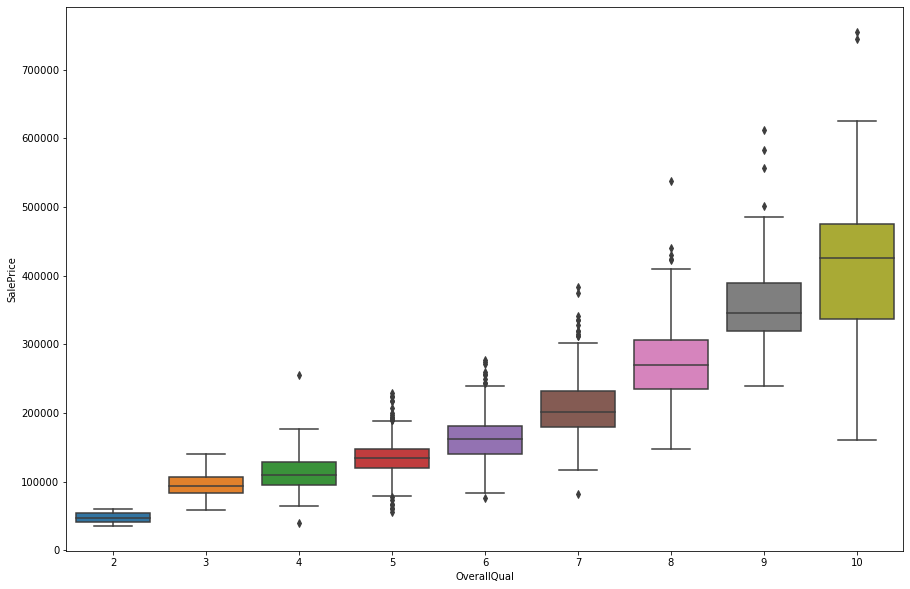

In [21]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'OverallQual', y = 'SalePrice',data = df)

**Checking for outliers in SalePrice**

<AxesSubplot:xlabel='SalePrice'>

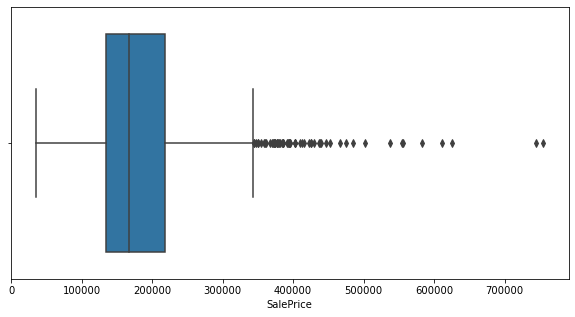

In [22]:
plt.figure(figsize= (10,5))
sns.boxplot(df['SalePrice'])

**Capping the outliers in SalePrice**

In [23]:
percentile25 = df['SalePrice'].quantile(0.25)
percentile75 = df['SalePrice'].quantile(0.75)

In [24]:
from scipy import stats

In [25]:
iqr = stats.iqr(df['SalePrice'], interpolation = 'midpoint')
iqr

83800.0

In [26]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(upper_limit,lower_limit )

343575.0 8225.0


In [27]:
df['SalePrice'] = np.where(
    df['SalePrice'] > upper_limit,
    upper_limit,
    np.where(
        df['SalePrice'] < lower_limit,
        lower_limit,
        df['SalePrice']
    )
)

<AxesSubplot:xlabel='SalePrice'>

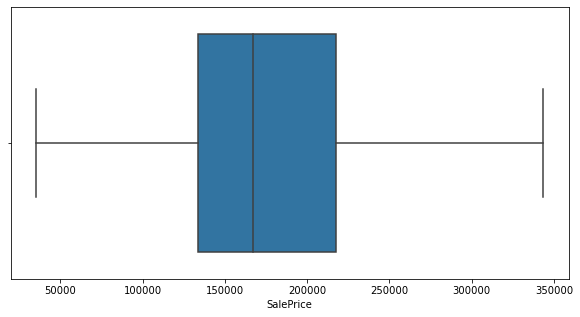

In [28]:
plt.figure(figsize= (10,5))
sns.boxplot(df['SalePrice'])

## We can observe in the above boxplot, that there are no outliers in the SalePrice after capping

**create a violin plot**

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

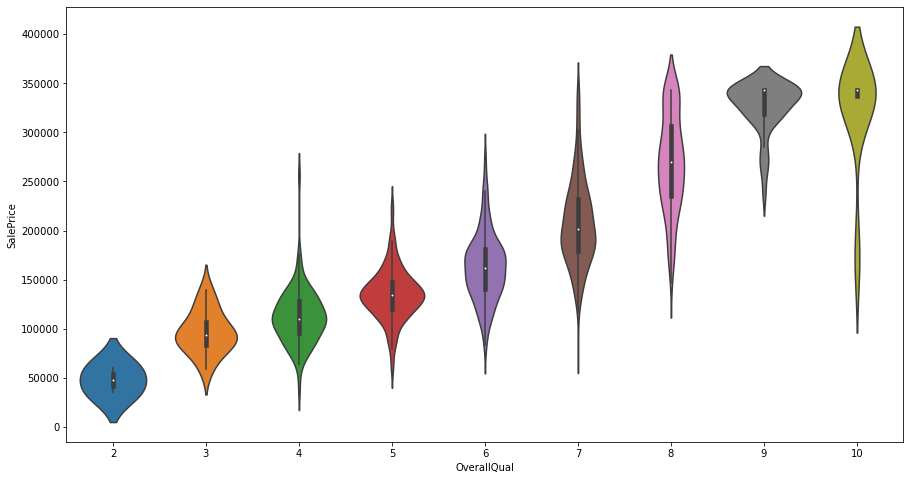

In [29]:
plt.figure(figsize=(15, 8))


sns.violinplot(df.OverallQual, df["SalePrice"])

**Creating histogram of all numeric varibales**

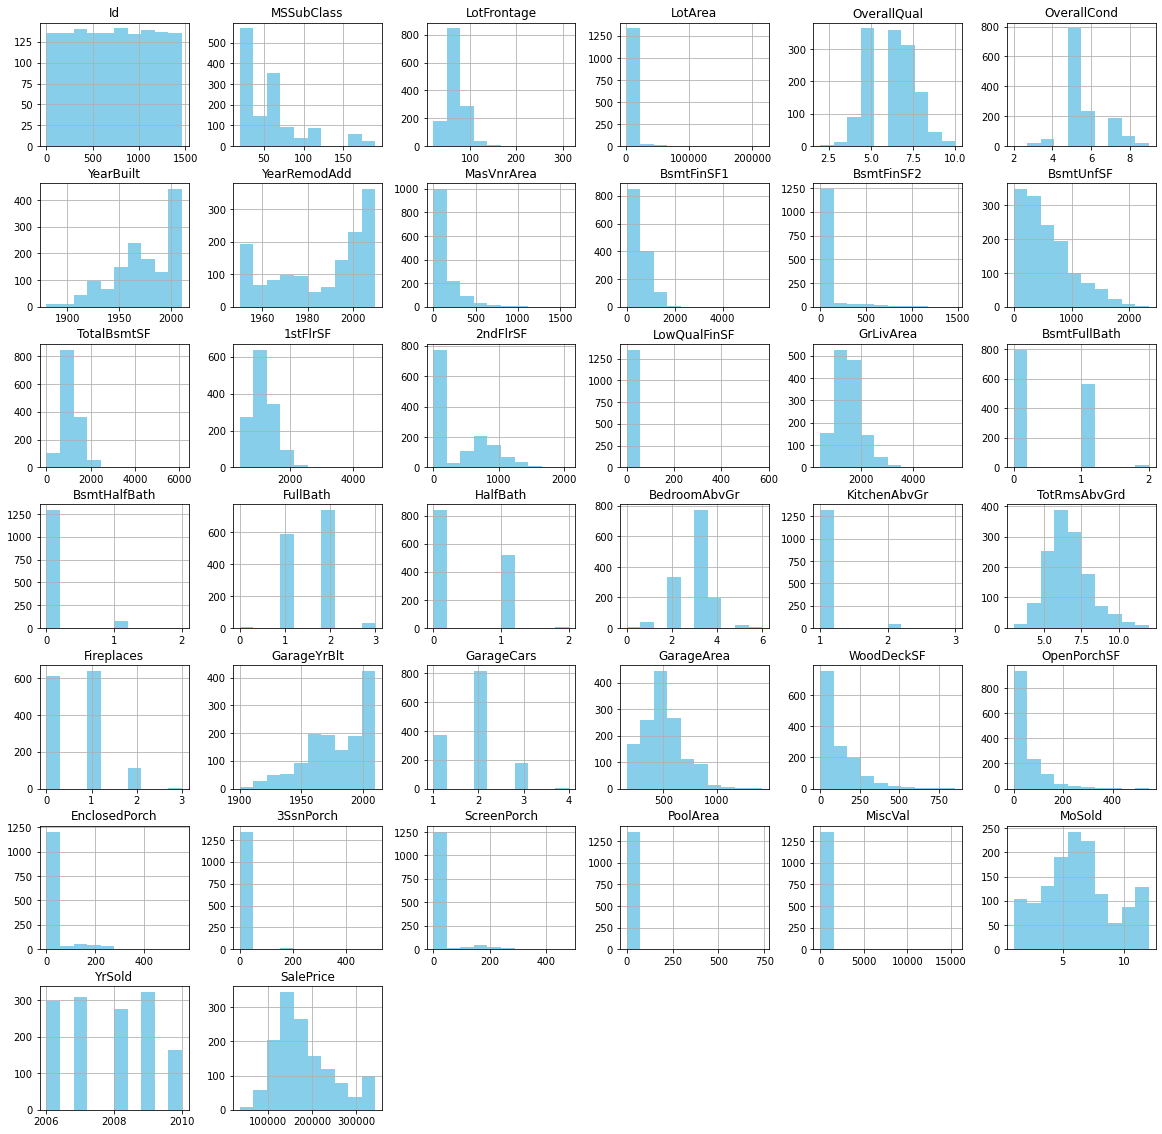

In [30]:
plt.rcParams['figure.figsize']=(20,20)


df.hist(color = 'skyblue')

plt.show()

**Creating scatter plots**

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

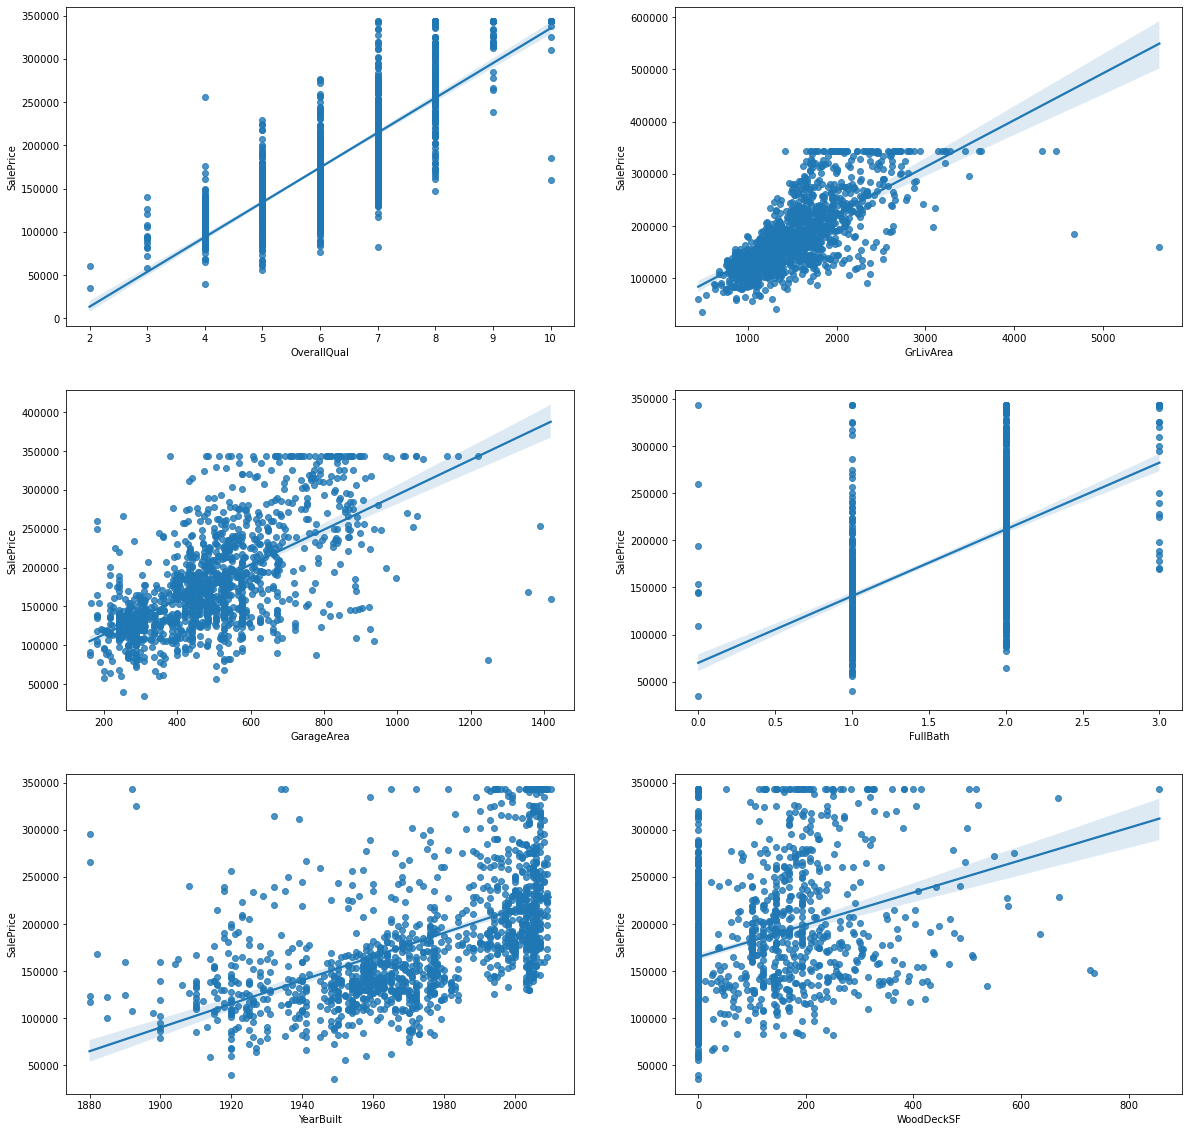

In [31]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.regplot(x =df['OverallQual'], y =df['SalePrice'], scatter=True, fit_reg=True, ax=ax1)
sns.regplot(x =df['GrLivArea'], y =df['SalePrice'], scatter=True, fit_reg=True, ax=ax2)
sns.regplot(x =df['GarageArea'], y =df['SalePrice'], scatter=True, fit_reg=True, ax=ax3)
sns.regplot(x =df['FullBath'], y =df['SalePrice'], scatter=True, fit_reg=True,ax=ax4)
sns.regplot(x =df['YearBuilt'], y =df['SalePrice'], scatter=True, fit_reg=True,ax=ax5)
sns.regplot(x =df['WoodDeckSF'], y =df['SalePrice'], scatter=True, fit_reg=True,ax=ax6)

**Normalizing the variables**

In [32]:
df_num = df.select_dtypes(exclude = 'object' )
df_cat = df.select_dtypes(include = 'object' )

In [33]:
df_norm = stats.zscore(df_num)

In [34]:
# Droping column Id as it is not a significant variable for our analysis
df_norm = df_norm.drop('Id', axis = 1)

In [35]:
df_norm.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.096089,-0.244178,-0.218825,0.608931,-0.538794,1.029146,0.864397,0.471073,0.548776,-0.293876,-0.947855,-0.499247,-0.830872,1.139894,-0.103415,0.339976,1.110997,-0.247452,0.772268,1.207013,0.171594,-0.194774,0.910628,-0.995547,0.998781,0.207038,0.255686,-0.770404,0.215042,-0.347641,-0.120153,-0.279614,-0.070923,-0.085816,-1.608876,0.141478,0.403940
1,-0.878130,0.439175,-0.106353,-0.135258,2.236197,0.109538,-0.456189,-0.591131,1.141603,-0.293876,-0.645978,0.433229,0.223013,-0.803943,-0.103415,-0.522724,-0.835379,3.937847,0.772268,-0.785285,0.171594,-0.194774,-0.346993,0.556102,-0.095364,0.207038,-0.217635,1.580501,-0.723834,-0.347641,-0.120153,-0.279614,-0.070923,-0.085816,-0.494538,-0.609779,-0.001696
2,0.096089,-0.107508,0.055020,0.608931,-0.538794,0.961026,0.815486,0.286813,0.069283,-0.293876,-0.308055,-0.352256,-0.664743,1.167208,-0.103415,0.486327,1.110997,-0.247452,0.772268,1.207013,0.171594,-0.194774,-0.346993,0.556102,0.917734,0.207038,0.578405,-0.770404,-0.077395,-0.347641,-0.120153,-0.279614,-0.070923,-0.085816,0.991245,0.141478,0.629293
3,0.339643,-0.471963,-0.111243,0.608931,-0.538794,-1.968095,-0.749653,-0.591131,-0.519185,-0.293876,-0.069257,-0.728921,-0.558316,0.916831,-0.103415,0.353456,1.110997,-0.247452,-1.055033,-0.785285,0.171594,-0.194774,0.281817,0.556102,0.796162,1.791633,0.761280,-0.770404,-0.185135,4.148420,-0.120153,-0.279614,-0.070923,-0.085816,-1.608876,-1.361036,-0.625173
4,0.096089,0.621403,0.349403,1.353119,-0.538794,0.926967,0.717665,1.305662,0.437621,-0.293876,-0.181898,0.164510,-0.080693,1.592849,-0.103415,1.279704,1.110997,-0.247452,0.772268,1.207013,1.449223,-0.194774,1.539439,0.556102,0.877210,1.791633,1.804738,0.744273,0.569044,-0.347641,-0.120153,-0.279614,-0.070923,-0.085816,2.105583,0.141478,1.027417


**Regression Analysis**

In [36]:
x = df_norm.drop('SalePrice', axis = 1)
y = df_norm['SalePrice']

In [37]:
print(x.shape,y.shape)

(1370, 36) (1370,)


**Splitting our data into train and test**

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [39]:
import statsmodels.api as sm

**Fitting our Linear Regression model and checking the performace**

In [40]:
lin_reg_model_1 = sm.OLS(y_train, x_train).fit()
lin_reg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              160.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                        0.00
Time:                        21:14:49   Log-Likelihood:                         -425.47
No. Observations:                 959   AIC:                                      918.9
Df Residuals:                     925   BIC:                                      1084.
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass       -0.1016      0.016     -6.492      0.000      -0.132      -0.071
LotFrontage      -0.0312      0.015     -2.122      0.034      -0.060      -0.002
LotArea           0.0643      0.012      5.311      0.000       0.041       0.088
OverallQual       0.3303      0.023     14.462      0.000       0.285       0.375
OverallCond       0.0785      0.016      5.022      0.000       0.048       0.109
YearBuilt         0.1986      0.030      6.519      0.000       0.139       0.258
YearRemodAdd      0.0564      0.019      2.900      0.004       0.018       0.095
MasVnrArea        0.0286      0.015      1.905      0.057      -0.001       0.058
BsmtFinSF1        0.0288      0.013      2.137      0.033       0.002       0.055
BsmtFinSF2       -0.0058      0.012     -0.485      0.628      -0.029       0.018
BsmtUnfSF        -0.0073      0.012     -0.622      0.534      -0.030       0.016
TotalBsmtSF       0.0207      0.017      1.252      0.211      -0.012       0.053
1stFlrSF          0.0956      0.020      4.763      0.000       0.056       0.135
2ndFlrSF          0.1054      0.018      5.739      0.000       0.069       0.141
LowQualFinSF     -0.0008      0.014     -0.059      0.953      -0.028       0.026
GrLivArea         0.1600      0.020      8.151      0.000       0.121       0.199
BsmtFullBath      0.0964      0.018      5.211      0.000       0.060       0.133
BsmtHalfBath     -0.0032      0.014     -0.238      0.812      -0.030       0.024
FullBath          0.0265      0.022      1.188      0.235      -0.017       0.070
HalfBath         -0.0178      0.019     -0.926      0.355      -0.056       0.020
BedroomAbvGr     -0.0333      0.019     -1.736      0.083      -0.071       0.004
KitchenAbvGr     -0.0518      0.015     -3.378      0.001      -0.082      -0.022
TotRmsAbvGrd      0.0710      0.027      2.588      0.010       0.017       0.125
Fireplaces        0.0587      0.016      3.695      0.000       0.028       0.090
GarageYrBlt      -0.0330      0.027     -1.219      0.223      -0.086       0.020
GarageCars        0.1222      0.025      4.793      0.000       0.072       0.172
GarageArea        0.0236      0.027      0.878      0.380      -0.029       0.076
WoodDeckSF        0.0588      0.014      4.251      0.000       0.032       0.086
OpenPorchSF       0.0198      0.014      1.401      0.162      -0.008       0.048
EnclosedPorch     0.0218      0.014      1.582      0.114      -0.005       0.049
3SsnPorch         0.0032      0.014      0.232      0.817      -0.024       0.031
ScreenPorch       0.0378      0.013      2.910      0.004       0.012       0.063
PoolArea         -0.0649      0.014     -4.561      0.000      -0.093      -0.037
MiscVal           0.0012      0.

**From out summary we can observe that their are 1o insignificant variable which means that the p-value of these variables are graeter than 0.05**

**Doing prediction on our test data**

In [41]:
predictions_model_1 = lin_reg_model_1.predict(x_test)
predictions_model_1

1142    2.152412
763     1.700992
1128    0.577213
424    -0.461546
407    -0.611057
          ...   
112     1.784177
820     0.153546
1146    0.185164
1386    0.872464
453     0.404700
Length: 411, dtype: float64

In [42]:
y_test

1142    2.433245
763     2.334466
1128    0.501593
424    -0.640197
407    -0.069302
          ...   
112     2.433245
820     0.020839
1146   -0.024231
1386    1.027417
453     0.426475
Name: SalePrice, Length: 411, dtype: float64

**Checking the RMSE and**

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mse1 = mean_squared_error(y_test, predictions_model_1)
rmse1 = np.sqrt(mse1)
print("RMSE:",rmse1)
print("MSE:",mse1)

RMSE: 0.42484436855906915
MSE: 0.18049273749635417


**Tabulating our first model's result**

In [45]:
cols = ['Model', 'RMSE']

tabulation = pd.DataFrame(columns = cols)

model_metrics = pd.Series({'Model': "Model 1 with all numeric varibales ",
                           'RMSE':rmse1, 'Adj R2': 0.850})

tabulation = tabulation.append(model_metrics, ignore_index = True)

tabulation

,Model,RMSE,Adj R2
0,Model 1 with all numeric varibales,0.424844,0.85


**Creating another regression model with only significant variable**

In [46]:
x1 = df_norm.drop(['SalePrice', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 
                  'BsmtUnfSF', 'LowQualFinSF','GrLivArea','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','GarageYrBlt'],axis = 1)
y1 = df_norm['SalePrice']

In [47]:
print(x1.shape,y1.shape)

(1370, 26) (1370,)


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=100)

In [49]:
import statsmodels.api as sm

In [50]:
lin_reg_model_2 = sm.OLS(y_train, x_train).fit()
lin_reg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.851
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              205.2
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                        0.00
Time:                        21:14:49   Log-Likelihood:                         -438.35
No. Observations:                 959   AIC:                                      928.7
Df Residuals:                     933   BIC:                                      1055.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass       -0.1030      0.014     -7.245      0.000      -0.131      -0.075
LotArea           0.0626      0.012      5.211      0.000       0.039       0.086
OverallQual       0.3584      0.022     16.335      0.000       0.315       0.402
OverallCond       0.0800      0.016      5.118      0.000       0.049       0.111
YearBuilt         0.1770      0.024      7.465      0.000       0.130       0.224
YearRemodAdd      0.0600      0.019      3.206      0.001       0.023       0.097
BsmtFinSF1        0.0433      0.019      2.243      0.025       0.005       0.081
TotalBsmtSF       0.0192      0.024      0.795      0.427      -0.028       0.067
1stFlrSF          0.2045      0.031      6.590      0.000       0.144       0.265
2ndFlrSF          0.2306      0.027      8.492      0.000       0.177       0.284
BsmtFullBath      0.0911      0.018      5.151      0.000       0.056       0.126
BsmtHalfBath     -0.0036      0.014     -0.266      0.790      -0.030       0.023
FullBath          0.0209      0.020      1.024      0.306      -0.019       0.061
TotRmsAbvGrd      0.0279      0.024      1.147      0.252      -0.020       0.076
Fireplaces        0.0675      0.016      4.276      0.000       0.037       0.099
GarageCars        0.1104      0.025      4.343      0.000       0.061       0.160
GarageArea        0.0190      0.026      0.742      0.458      -0.031       0.069
WoodDeckSF        0.0632      0.014      4.573      0.000       0.036       0.090
OpenPorchSF       0.0196      0.014      1.385      0.166      -0.008       0.047
EnclosedPorch     0.0218      0.014      1.571      0.116      -0.005       0.049
3SsnPorch         0.0056      0.014      0.402      0.688      -0.022       0.033
ScreenPorch       0.0403      0.013      3.102      0.002       0.015       0.066
PoolArea         -0.0698      0.014     -4.976      0.000      -0.097      -0.042
MiscVal          -0.0018      0.011     -0.164      0.870      -0.023       0.019
MoSold            0.0068      0.013      0.524      0.601      -0.019       0.032
YrSold           -0.0309      0.013     -2.415      0.016      -0.056      -0.006
==============================================================================
Omnibus:                      526.940   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30284.676
Skew:                          -1.729   Prob(JB):                         0.00
Kurtosis:                      30.312   Cond. No.                         8.30
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume th

In [51]:
predictions_model_2 = lin_reg_model_2.predict(x_test)
predictions_model_2

1142    2.025895
763     1.613825
1128    0.616369
424    -0.489776
407    -0.605455
          ...   
112     1.730357
820     0.206658
1146    0.232751
1386    0.770156
453     0.481999
Length: 411, dtype: float64

In [52]:
y_test

1142    2.433245
763     2.334466
1128    0.501593
424    -0.640197
407    -0.069302
          ...   
112     2.433245
820     0.020839
1146   -0.024231
1386    1.027417
453     0.426475
Name: SalePrice, Length: 411, dtype: float64

In [53]:
mse2 = mean_squared_error(y_test, predictions_model_2)
rmse2 = np.sqrt(mse2)
print("RMSE:",rmse2)
print("MSE:",mse2)

RMSE: 0.426352728170177
MSE: 0.18177664881815284


**Tablulating second model's result**

In [54]:
model_metrics1 = pd.Series({'Model': "Model 2 with significant variables ",
                            'RMSE':rmse2, 'Adj R2': 0.847})

tabulation = tabulation.append(model_metrics1, ignore_index = True)

tabulation

,Model,RMSE,Adj R2
0,Model 1 with all numeric varibales,0.424844,0.850
1,Model 2 with significant variables,0.426353,0.847


**Creating another rigression model with categorical variables and dummy encoding**

**performing one-hot dummy encoding**

In [55]:
df_cat_ec =pd.get_dummies(df_cat, drop_first=True)
df_cat_ec.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No condition,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1

**Combinig the the numeric and dummy encoded variables into one dataframe**

In [56]:
df_combine = pd.concat([df_norm, df_cat_ec], axis = 1)

In [57]:
df_combine.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No condition,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Exposure,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_No

In [58]:
x2 = df_combine.drop('SalePrice', axis = 1)
y2 = df_norm['SalePrice']

In [59]:
print(x2.shape,y2.shape)

(1370, 253) (1370,)


In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=100)

In [61]:
import statsmodels.api as sm

In [62]:
lin_reg_model_3 = sm.OLS(y_train, x_train).fit()
lin_reg_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     62.68
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:14:50   Log-Likelihood:                 121.69
No. Observations:                 959   AIC:                             232.6
Df Residuals:                     721   BIC:                             1391.
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MSSubClass                  -0.0643      0.045     -1.439      0.151      -0.152       0.023
LotFrontage                  0.0051      0.013      0.388      0.698      -0.021       0.031
LotArea                      0.1106      0.015      7.425      0.000       0.081       0.140
OverallQual                  0.1599      0.020      7.988      0.000       0.121       0.199
OverallCond                  0.0796      0.014      5.783      0.000       0.053       0.107
YearBuilt                    0.1300      0.036      3.603      0.000       0.059       0.201
YearRemodAdd                 0.0289      0.016      1.759      0.079      -0.003       0.061
MasVnrArea                   0.0059      0.014      0.410      0.682      -0.022       0.034
BsmtFinSF1                   0.0760      0.015      5.096      0.000       0.047       0.105
BsmtFinSF2                   0.0142      0.016      0.877      0.381      -0.018       0.046
BsmtUnfSF                   -0.0066      0.013     -0.520      0.603      -0.032       0.018
TotalBsmtSF                  0.0787      0.021      3.670      0.000       0.037       0.121
1stFlrSF                     0.0824      0.024      3.455      0.001       0.036       0.129
2ndFlrSF                     0.1919      0.026      7.441      0.000       0.141       0.242
LowQualFinSF                -0.0129      0.018     -0.718      0.473      -0.048       0.022
GrLivArea                    0.2225      0.019     11.409      0.000       0.184       0.261
BsmtFullBath                 0.0339      0.014      2.362      0.018       0.006       0.062
BsmtHalfBath                -0.0003      0.010     -0.027      0.979      -0.020       0.019
FullBath                     0.0123      0.018      0.690      0.490      -0.023       0.047
HalfBath                     0.0024      0.016      0.154      0.877      -0.028       0.033
BedroomAbvGr                -0.0069      0.016     -0.435      0.664      -0.038       0.024
KitchenAbvGr                -0.0125      0.021     -0.602      0.548      -0.053       0.028
TotRmsAbvGrd                -0.0170      0.022     -0.779      0.436      -0.060       0.026
Fireplaces                   0.0088      0.023      0.382      0.702      -0.036       0.054
GarageYrBlt                 -0.0177      0.023     -0.773      0.440      -0.063       0.027
GarageCars                   0.0234      0.020      1.175      0.241      -0.016       0.062
GarageArea                   0.0892      0.022      4.116      0.000       0.047       0.132
WoodDeckSF                   0.0431      0.010      4.234      0.000       0.023       0.063
OpenPorchSF                  0.0238      0.011      2.111      0.035       0.002       0.046
EnclosedPorch                0.0075      0.011      0.691      0.490      -0.014       0.029
3SsnPorch     

In [63]:
predictions_model_3 = lin_reg_model_3.predict(x_test)
predictions_model_3

1142    2.402957
763     1.776939
1128    0.483246
424    -0.639725
407    -0.576997
          ...   
112     2.225191
820     0.158786
1146   -0.121679
1386   -1.651478
453     0.402744
Length: 411, dtype: float64

In [64]:
y_test

1142    2.433245
763     2.334466
1128    0.501593
424    -0.640197
407    -0.069302
          ...   
112     2.433245
820     0.020839
1146   -0.024231
1386    1.027417
453     0.426475
Name: SalePrice, Length: 411, dtype: float64

In [65]:
mse3 = mean_squared_error(y_test, predictions_model_3)
rmse3 = np.sqrt(mse3)
print("RMSE:",rmse3)
print("MSE:",mse3)

RMSE: 0.8304591713508415
MSE: 0.6896624352807263


In [66]:
model_metrics2 = pd.Series({'Model': "Model 3 with dummy encoding",
                            'RMSE':rmse3, 'Adj R2': 0.938})

tabulation = tabulation.append(model_metrics2, ignore_index = True)

tabulation

,Model,RMSE,Adj R2
0,Model 1 with all numeric varibales,0.424844,0.850
1,Model 2 with significant variables,0.426353,0.847
2,Model 3 with dummy encoding,0.830459,0.938


**Model 4 with only significant variables and categorical variables**

In [67]:
x3 = df_combine.drop(['SalePrice', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 
                  'BsmtUnfSF', 'LowQualFinSF','GrLivArea','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','GarageYrBlt'],axis = 1)
y3 = df_combine['SalePrice']

In [68]:
print(x3.shape,y3.shape)

(1370, 243) (1370,)


In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=100)

In [70]:
lin_reg_model_4 = sm.OLS(y_train, x_train).fit()
lin_reg_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     65.34
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:14:50   Log-Likelihood:                 119.93
No. Observations:                 959   AIC:                             220.1
Df Residuals:                     729   BIC:                             1339.
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MSSubClass                  -0.0657      0.044     -1.484      0.138      -0.153       0.021
LotArea                      0.1130      0.015      7.763      0.000       0.084       0.142
OverallQual                  0.1605      0.020      8.075      0.000       0.121       0.199
OverallCond                  0.0784      0.013      5.822      0.000       0.052       0.105
YearBuilt                    0.1223      0.034      3.637      0.000       0.056       0.188
YearRemodAdd                 0.0283      0.016      1.762      0.079      -0.003       0.060
BsmtFinSF1                   0.0796      0.019      4.195      0.000       0.042       0.117
TotalBsmtSF                  0.0751      0.030      2.473      0.014       0.015       0.135
1stFlrSF                     0.2497      0.031      8.059      0.000       0.189       0.311
2ndFlrSF                     0.3812      0.035     10.757      0.000       0.312       0.451
BsmtFullBath                 0.0360      0.014      2.581      0.010       0.009       0.063
BsmtHalfBath                -0.0004      0.010     -0.038      0.970      -0.020       0.019
FullBath                     0.0064      0.016      0.399      0.690      -0.025       0.038
TotRmsAbvGrd                -0.0226      0.020     -1.149      0.251      -0.061       0.016
Fireplaces                   0.0075      0.023      0.330      0.741      -0.037       0.052
GarageCars                   0.0232      0.020      1.189      0.235      -0.015       0.062
GarageArea                   0.0856      0.021      4.127      0.000       0.045       0.126
WoodDeckSF                   0.0431      0.010      4.266      0.000       0.023       0.063
OpenPorchSF                  0.0240      0.011      2.172      0.030       0.002       0.046
EnclosedPorch                0.0061      0.011      0.565      0.572      -0.015       0.027
3SsnPorch                    0.0151      0.010      1.449      0.148      -0.005       0.036
ScreenPorch                  0.0194      0.010      2.029      0.043       0.001       0.038
PoolArea                     0.1666      0.064      2.602      0.009       0.041       0.292
MiscVal                      0.0924      0.047      1.962      0.050   -8.07e-05       0.185
MoSold                       0.0059      0.009      0.638      0.523      -0.012       0.024
YrSold                      -0.0152      0.009     -1.618      0.106      -0.034       0.003
MSZoning_FV                  0.4448      0.226      1.970      0.049       0.001       0.888
MSZoning_RH                  0.3095      0.234      1.320      0.187      -0.151       0.770
MSZoning_RL                  0.3853      0.213      1.813      0.070      -0.032       0.803
MSZoning_RM                  0.2375      0.204      1.164      0.245      -0.163       0.638
Street_Pave   

In [71]:
predictions_model_4 = lin_reg_model_4.predict(x_test)
predictions_model_4

1142    2.392459
763     1.765761
1128    0.495458
424    -0.622224
407    -0.557925
          ...   
112     2.230185
820     0.150528
1146   -0.109155
1386   -1.569241
453     0.405037
Length: 411, dtype: float64

In [72]:
y_test

1142    2.433245
763     2.334466
1128    0.501593
424    -0.640197
407    -0.069302
          ...   
112     2.433245
820     0.020839
1146   -0.024231
1386    1.027417
453     0.426475
Name: SalePrice, Length: 411, dtype: float64

In [73]:
mse4 = mean_squared_error(y_test, predictions_model_4)
rmse4 = np.sqrt(mse4)
print("RMSE:",rmse4)
print("MSE:",mse4)

RMSE: 0.8160722833816993
MSE: 0.6659739717038206


In [74]:
model_metrics3 = pd.Series({'Model': "Model 4 with dummy and siginificant variable",
                            'RMSE':rmse4, 'Adj R2': 0.939})

tabulation = tabulation.append(model_metrics3, ignore_index = True)

tabulation

,Model,RMSE,Adj R2
0,Model 1 with all numeric varibales,0.424844,0.850
1,Model 2 with significant variables,0.426353,0.847
2,Model 3 with dummy encoding,0.830459,0.938
3,Model 4 with dummy and siginificant variable,0.816072,0.939


### From the above table, we will go ahead and choose model 1 because it has the lowest rmse and the Adj R2 is also quite good